# Linear Regression

This notebook introduces the concept of linear regression analysis, provides a function for conducting linear regression analysis, and provides an example.  Throughout this notebook, we will use the Fish Market dataset located on Kaggle to demonstrate many of these topics.

In [1]:
import pandas as pd                                                             # Import pandas

df = pd.read_csv('C:/Users/hornb/Desktop/Fish.csv')                             # Read in csv file Fish.csv
df.head()                                                                       # Display top 5 rows

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Introduction

Central to the field of data analytics is the concept of examining and quantifying the relationship between variables.  Linear regression analysis offers a useful starting point considering whether there exists a linear relationship between variables under study.  That is, does an increase in one variable result in a proportional change in another variable?

In [2]:
import matplotlib.pyplot as plt                                                 # Import pyplot package

plt.scatter(df['Length1'], df['Weight'])                                        # Generate scatter plot
plt.ylabel('Fish Weight (g)')                                                   # Label y-axis
plt.xlabel('Fish Vertical Length (cm)')                                         # Label x-axis
plt.show()                                                                      # Display plot

<Figure size 640x480 with 1 Axes>

For instance, the plot above examines the relationship between the weight of a fish and the fish's length.  By looking at the plot, can we tell whether a change in one variable corresponds to a proporational change to another variable?  And taking this thought a step further, if there is a relationship between these variables and we know the value of one variable, can we use that to predict the value of the other variable?  The field of multivariate analysis allows us to tackle this idea; for this notebook, we will focus specifically on whether variables have linear relationships via linear regression analysis.

To begin, there are some key ideas and terms that need to be addressed:
- <b>Correlation:</b> The strength of the linear relationship between two variables.  A coorelation can be thought of as a score to indicate the degree to which a change in one variable corresponds to a change in the other.  Correlation, specifically the <i>Pearson's Correlation Coefficient</i> spans between the values of -1 and 1.  Correlations close to -1 or 1 represent strong relationships between the variables, whereas correlations close to 0 represent weak relationships.  Correlations that are positive imply that an increase in one variable corresponds to an increase in the other variable; the relationship between studying for a test and the resulting test score is likely to be positively correlated.  Conversely, correlations that are negative imply that an increase in one variable corresponds to a decrease in the other variable; the relationship between hours spent exercises and body weight might be expected to have a negative correlation.
- <b>Correlation does not imply causation.</b>  This is a central tenant to any conversation regarding correlation and regressiona analysis.  The fact that two variables appear to have a relationship to one another does not mean that these two variables are directly related or that one is causing the other to change.  For instance, there is likely to positive correlation between ice cream sales and deaths by drowning.  This would not suggest that ice cream causes people to drown, or that drowning deaths cause people to eat more ice cream.  In this instance, they both happen to occur more often during times of warmer weather.
- <b>Independent Variable:</b> The variables that we are using as predictors.  In linear regression analysis, we will identify variables that are correlated and then attempt to utilize that relationship to predict the value of one variable when we know the value(s) of the other(s).  When plotting a relationship in this manner, it is customary to plot the independent variable along the x-axis.
- <b>Dependent Variable:</b> The variable that we are attempting to predict.  When plotting a relationship in this manner, it is customary to plot the dependent variable along the y-axis.
- <b>Correlation of Determination:</b> A measure indicating the proporation of the variation in the dependent variable that is explained by the independent variables.  This value is often denoted as $R^2$ and is on a scale between 0 to 1, presenting the proporation of the variation explained by the regression model.

Now that these key terms are discussed, let's build upon these ideas using the Fish.csv dataset.  First, we will consider the 6 numerical variables in our dataset and examine the correlation between these values.

In [3]:
num_df = df.drop(['Species'], axis = 1)                                         # Create dataframe; drop categorical value
corr_matrix = num_df.corr()                                                     # Generate correlation matrix
display(corr_matrix)                                                            # Display correlation matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In the above correlation matrix, we can see the degree to which each of these variables are correlated to one another.  To interpret this matrix, look at the value where the two variables intersect.  For example, the correlation between Weight and Length1 is 0.9157.  Note that a correlation matrix will always have the value of 1 going down the diagonal (since any value is perfectly related to itself) and that the matrix is symmetrical across the diagonal (as the relationship between Weight & Length1 is the same as the relationship between Length1 & Weight).

Having identified the the correlations between all of the variables, it is worth noting that every variable appears to be positively correlated to every other variable, and that these relationship appear to be strong.  This is important in more later considerations of linear regression analysis, such as when considering the effects of <b>multicollinearity</b>.

For now, let's consider this scenario: We have measurement data on the fish and we want to know how much of a fish's weight is caused by it's dimensions.  To do this, let's start by constructing a simple linear regression model.

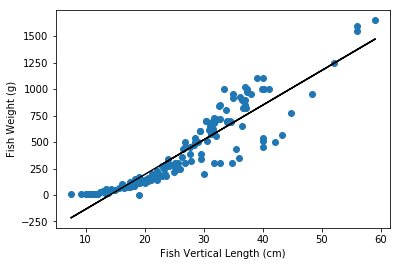

The Coefficient of Correlation for this model is 0.839.


In [4]:
from sklearn.linear_model import LinearRegression                               # Import Linear Regression package

x = df['Length1'].values.reshape(-1, 1)                                         # Define independent variable
y = df['Weight']                                                                # Define dependent variable

model = LinearRegression()                                                      # Initialize model
model.fit(x, y)                                                                 # Generate model

plt.scatter(x, y)                                                               # Generate scatter plot
plt.plot(x, model.predict(x), c = 'black')                                      # Generate regression line
plt.ylabel('Fish Weight (g)')                                                   # Label y-axis
plt.xlabel('Fish Vertical Length (cm)')                                         # Label x-axis
plt.show()                                                                      # Display plot

print(f'The Coefficient of Correlation for this model is {model.score(x, y).round(3)}.')    # Print R^2 value for model

In this simple linear regression model, we find that differences in the vertical length of fish in our dataset account for 83.9% of the variation observed in the fish weights.  Since we are only comparing two variables, our model is two-dimensional and we can easily illustrate this relationship on the plot above.

In the above plot, each blue dot represents a fish in the dataset.  The black line running through the data points is the <i>regression line</i> and shows the estimated linear relationship between the fish weights and vertical lengths.  The vertical distance between each datapoint and the line represents error in the model, and the line is drawn in such a way that the total error above the regression line is equal to the total error below the regression line.

Since we have more measurement data, we can add complexity to our model by constructing a multiple linear regression model.

In [5]:
x = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]                    # Define independent variables
y = df['Weight']                                                                # Define dependent variable

model = LinearRegression()                                                      # Initialize model
model.fit(x, y)                                                                 # Generate model

print(f'The Coefficient of Correlation for this model is {model.score(x, y).round(3)}.')    # Print R^2 value for model

The Coefficient of Correlation for this model is 0.885.


In the above multiple linear regression model, we added every every size variable into the model and find that the model now accounts for 88.5% of the variation observed in the fish weights.  We should be careful however, because the LinearRegression() function does not provide us with all the information that may be useful when evaluating the effectiveness of a multiple linear regression model.  To that end, let's build the same model but utilize the StatsModels package instead.

In [6]:
import statsmodels.api as sm                                                    # Import Linear Regression package

x = sm.add_constant(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])   # Define independent variables, add col of 1 for intercept variable
y = df['Weight']                                                                # Define dependent variable

model = sm.OLS(y, x)                                                            # Initialize model; note dependent before independent
results = model.fit()                                                           # Generate model

results.summary()                                                               # Output report

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           4.95e-70
Time:                        21:59:01   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the model's summary report, we still find that the $R^2$ value is 0.885, but now we have information into the significance of the model and the performance of each of the variables.  In particular, we can utilize the $t$ and $P > |t|$ values to identify variables that are not significantly contributing to the explaination of the dependent variable.  Using this information, we can incrementally remove variables from the model that are not statistically significant in describe variation in our dependent variable.

In [7]:
import statsmodels.api as sm                                                    # Import Linear Regression package

x = sm.add_constant(df[['Length1', 'Height']])                                  # Define independent variables, add col of 1 for intercept variable
y = df['Weight']                                                                # Define dependent variable

model = sm.OLS(y, x)                                                            # Initialize model; note dependent before independent
results = model.fit()                                                           # Generate model

results.summary()                                                               # Output report

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     552.6
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.59e-71
Time:                        21:59:04   Log-Likelihood:                -993.95
No. Observations:                 159   AIC:                             1994.
Df Residuals:                     156   BIC:                             2003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -502.5893     28.903    -17.389      0.000    -559.681    -445.498
Length1       27.2135      1.292     21.059      0.000      24.661      29.766
Height        20.8048      3.014      6.903      0.000      14.852      26.758
==============================================================================
Omnibus:                        5.122   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.649
Skew:                           0.381   Prob(JB):                       0.0979
Kurtosis:                       3.349   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The final linear regression model is $Y_{weight} = -502.589 + 27.214X_{length} + 20.805X_{height}$ and accounts for 87.6% of the variation in fish weights observed in the market.  To improve upon this model, we can astutely note that out dataset also includes the types of fish and could attempt to build linear regression models for each fish.  For example, by looking at only the Bream fish, we find that an even stronger model can be constructed using only the variable of height.

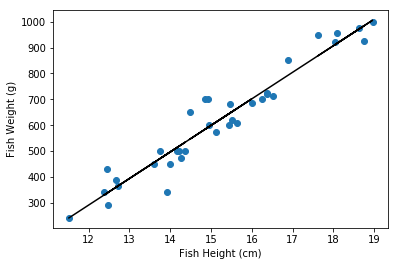

The Coefficient of Correlation for this model is 0.93.


In [8]:
br_df = df[df['Species'] == 'Bream']                                            # Subset dataframe to only Bream fish
x = br_df['Height'].values.reshape(-1, 1)                                       # Define independent variable
y = br_df['Weight']                                                             # Define dependent variable

model = LinearRegression()                                                      # Initialize model
model.fit(x, y)                                                                 # Generate model

plt.scatter(x, y)                                                               # Generate scatter plot
plt.plot(x, model.predict(x), c = 'black')                                      # Generate regression line
plt.ylabel('Fish Weight (g)')                                                   # Label y-axis
plt.xlabel('Fish Height (cm)')                                                  # Label x-axis
plt.show()                                                                      # Display plot

print(f'The Coefficient of Correlation for this model is {model.score(x, y).round(3)}.')    # Print R^2 value for model